this is for function testing and other fun things

In [51]:
from UNet_class_and_functions import*
import torch

$$ F(x) = max_{i \in  [0,17] } (f_i (min(  \frac{||x-a_i||_2}{r}, 1)   )) $$

 with $ f : u \mapsto (1-u)^2 $ and $ r=60  \surd 2 $

$ f : u \mapsto (1-u)^d $ and $ r=60  \surd 2 $

[-85 -84 -83 -82 -81 -80 -79 -78 -77 -76 -75 -74 -73 -72 -71 -70 -69 -68
 -67 -66 -65 -64 -63 -62 -61 -60 -59 -58 -57 -56 -55 -54 -53 -52 -51 -50
 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32
 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14
 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4
   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85]


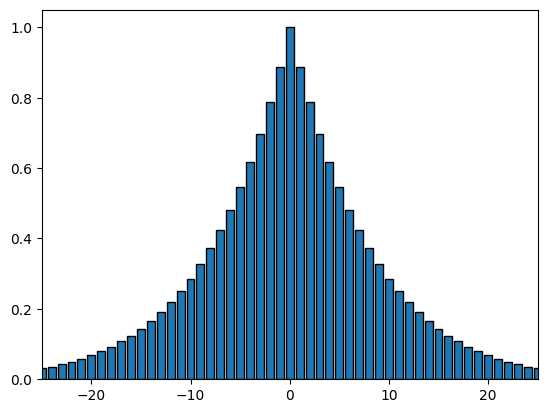

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def peak_drawer(r,d):
    r = int(np.round(r))
    space = np.arange(-r,r+1,1)
    print(space)
    values = np.power(1-np.abs(space)/r,d)
    plt.xlim(-25,25)
    plt.bar(space,values,edgecolor = 'black')
    plt.show()


peak_drawer(60 * np.sqrt(2), 10)

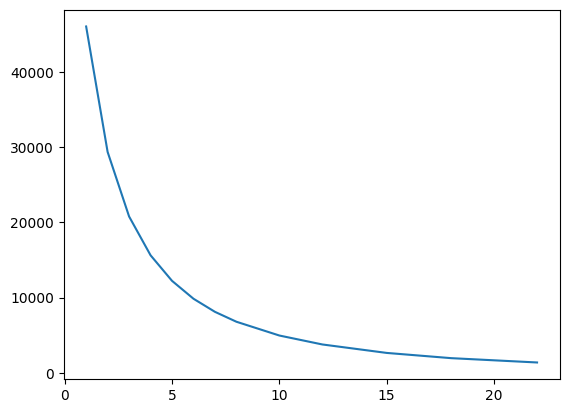

In [20]:
#open some annotations and displaying some density maps

annotations_directory = "/home/gabriel/Documents/TR DIMA/data/UMons_preprocessed_images_annotations_v2"

content = list_directory_contents(annotations_directory)

degrees = [1,2,3,4,5,6,7,8,10,12,15,18,22]



volumes = np.zeros(len(degrees))

 
for name in content:
    current_annotations = np.load(annotations_directory + '/' + name)

    current_annotations = current_annotations[:,::-1]

    relief_functions_test = dict(zip([i for i in range(len(current_annotations))],[np.power]*len(current_annotations)))

    parameters_test = { i : [1] for i in range(len(current_annotations))}

    radius = [60*np.sqrt(2) for i in range(18)]



    image = creation_relief_ulti_v2(current_annotations,radius,relief_functions_test,parameters_test)

    for i,d in enumerate(degrees):
        image_d = np.power(image,d)
        current_volume = np.sum(image_d) / len(content)
        
        volumes[i] += current_volume
plt.plot(degrees,volumes)
plt.show()






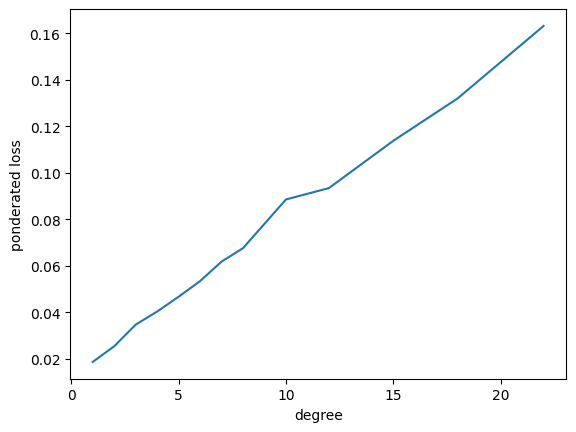

In [53]:
true_degrees = np.array([1,2,3,4,5,6,7,8,10,12,15,18,22])
true_val_errors = np.array([0.00653,0.00567,0.00549,0.00480,0.00435,0.00401,0.00382,0.00350,0.00335,0.00269,0.00230,0.00197,0.00172])

plt.plot(true_degrees,true_val_errors/volumes*256*512)
plt.xlabel('degree')
plt.ylabel('ponderated loss')
plt.show()

In [54]:
#opening a model and calculating output of the model for validation set

model_name = "UNet_150_epoch_lr=0.001_seed=58_func=pow_param=8"
model_directory = "/home/gabriel/Documents/TR DIMA/data_clean/models"

model_load = torch.load(model_directory + '/'  + model_name + '.pth',weights_only = False)
model_load.to('cuda') #remove this if you are not using cuda
model_load.eval()  # model to evaluation mode

UNet(
  (encoder1): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (encoder2): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (encoder3): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(32, 64, kernel_

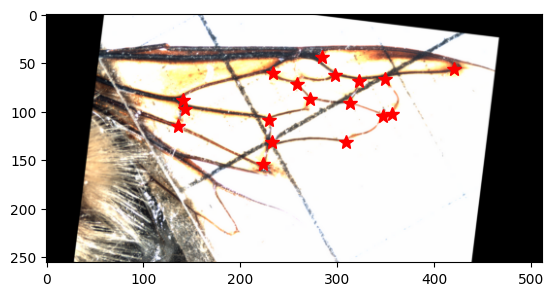

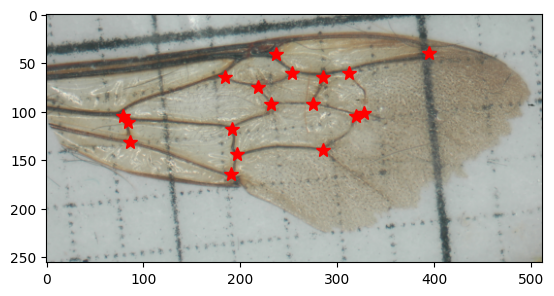

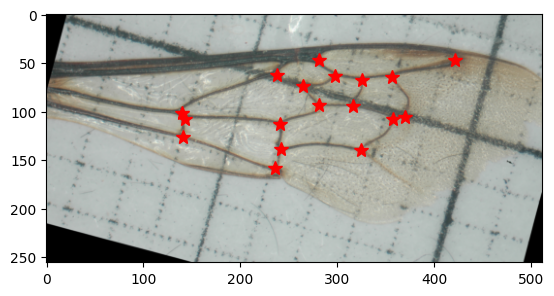

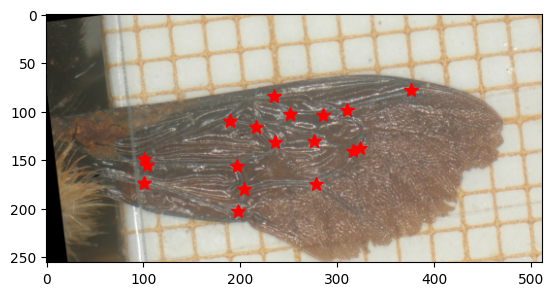

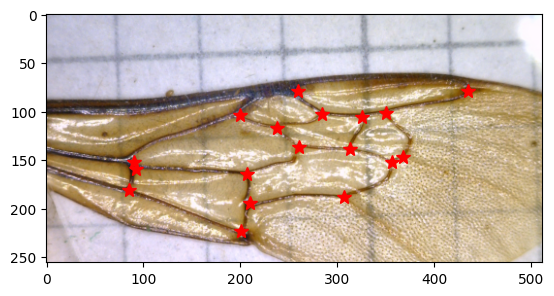

In [55]:
#loading images
images_directory = "/home/gabriel/Documents/TR DIMA/data/UMons_preprocessed_images_v2"
annotations_directory = "/home/gabriel/Documents/TR DIMA/data/UMons_preprocessed_images_annotations_v2"

images_list = []

annotations_list = []

names = list_directory_contents(images_directory)

for i,name in enumerate(names):

    match = re.search(r'_(\d+)\.png', name) # Regular expression to extract the number

    number = int(match.group(1))

    image = cv2.imread(images_directory + '/' + name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    raw_annotation = np.load(annotations_directory+'/'+ f'UMons_preprocessed_data_annotations_v2_{number}.npy')
    
    raw_annotation = raw_annotation[:,::-1]

    if i < 5:
        plt.imshow(image)
        plt.plot(raw_annotation[:,1],raw_annotation[:,0],'r*', markersize = 10)
        plt.show()
    annotations_list.append(raw_annotation)
    images_list.append(image)

In [56]:
from sklearn.model_selection import train_test_split

random_seed = RANDOM_SEED #this variable is global to keep the same separation for all tests. We can thus avoid data leakage


train_set_index, test_set_index = train_test_split(np.array([i for i in range(len(images_list))]), test_size=0.2, random_state=58)
val_set_index, test_set_index = train_test_split(test_set_index, test_size=0.5, random_state=random_seed)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [175 182 180]
  [176 184 181]
  [176 185 182]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [173 181 179]
  [176 185 182]
  [176 185 182]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [172 182 178]
  [175 184 181]
  [175 184 181]]

 ...

 [[ 81  82  81]
  [180 184 183]
  [182 187 185]
  ...
  [182 193 189]
  [182 191 188]
  [181 190 187]]

 [[ 59  60  59]
  [178 181 180]
  [182 187 186]
  ...
  [182 191 188]
  [181 190 187]
  [180 189 186]]

 [[ 42  42  42]
  [174 176 175]
  [182 186 185]
  ...
  [183 191 188]
  [181 190 187]
  [180 189 186]]]


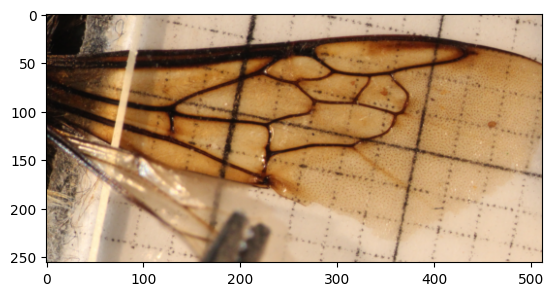

In [57]:
images_val = np.array(images_list)[val_set_index]

for im in images_val:
    print(im)
    plt.imshow(image)
    plt.show()
    break
images_val_t = []
for im in images_val:
    im_t = torch.tensor(im.transpose(2,0,1)/255,dtype = torch.float32).unsqueeze(0)
    images_val_t.append(im_t)



In [58]:
outs = []


for im_t in images_val_t:
    im_c = im_t.to('cuda')
    output = model_load(im_c)
    print(output.shape)
    true_output = output.cpu().squeeze(0).detach().numpy()
    outs.append(true_output)
    del im_c

torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1, 1, 256, 512])
torch.Size([1,

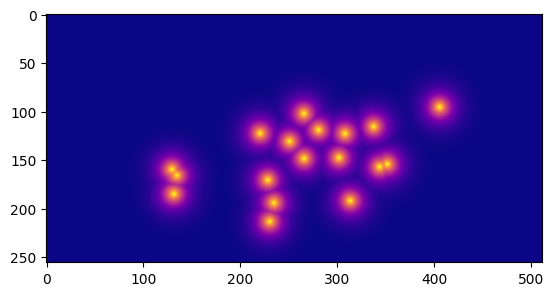

In [59]:
for out in outs:
    out = out.transpose(1,2,0)
    out = out.squeeze(axis=2)
    plt.imshow(out,cmap = 'plasma')
    plt.show()
    break

In [60]:
#calculating metrics on theses images
#first : calculating ground truth for validation set
val_annotations = []







 


full_annotations = np.array(annotations_list)
val_annotations = full_annotations[val_set_index]


In [61]:
val_images_annotations = []

for ann in val_annotations:

    relief_functions_test = dict(zip([i for i in range(len(ann))],[np.power]*len(ann)))

    parameters_test = { i : [8] for i in range(len(ann))}

    radius = [60*np.sqrt(2) for i in range(18)]
    image_ann = creation_relief_ulti_v2(ann,radius,relief_functions_test,parameters_test)
    val_images_annotations.append(image_ann)


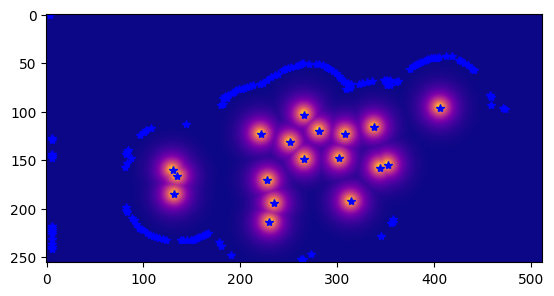

In [62]:
from skimage.morphology import local_maxima

testo = outs[0].transpose(1,2,0)

maximax = np.argwhere(local_maxima(testo) == True)


plt.imshow(testo,cmap = 'plasma')
plt.plot(maximax[:,1],maximax[:,0],'b*')
plt.show()

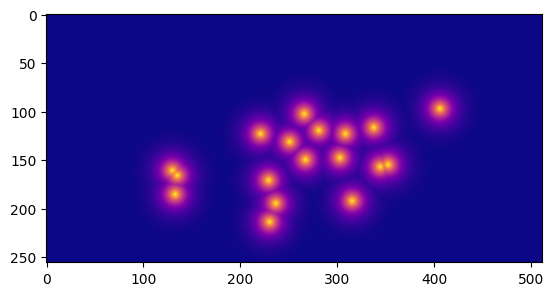

In [63]:
for im in val_images_annotations:
    plt.imshow(im,cmap = 'plasma')
    plt.show()
    break

0.003721055751810122


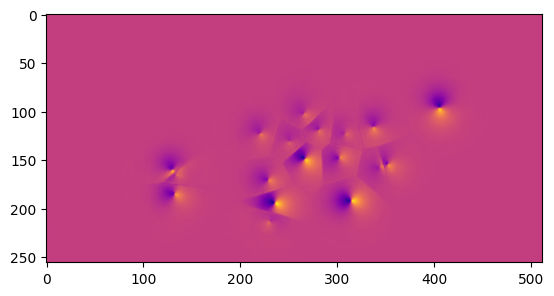

0.004723540330232184


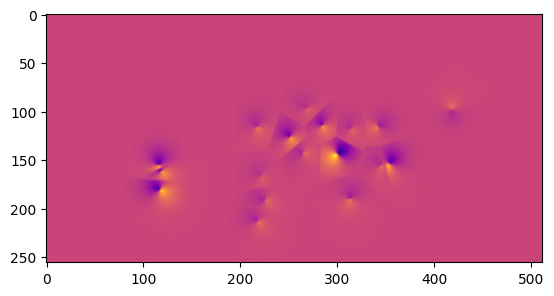

0.004707865567628111


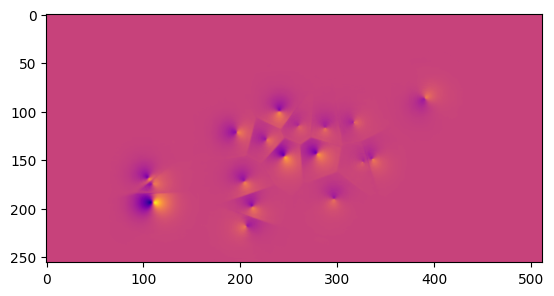

0.0038828483922298076


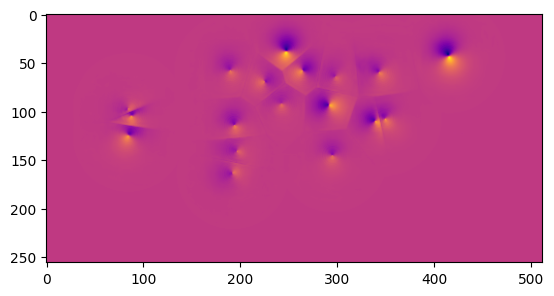

0.004709918296152824


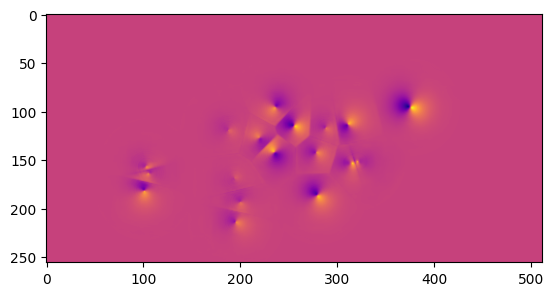

0.0037606416473380945


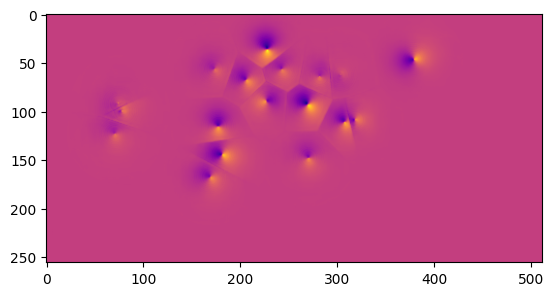

0.0035419099691546495


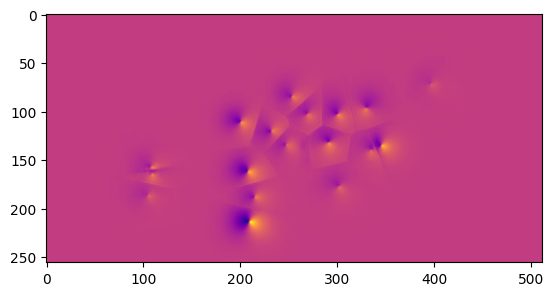

0.005249038259779323


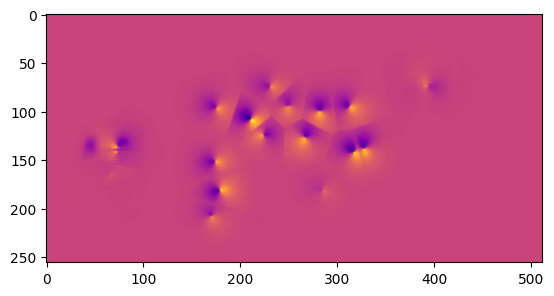

0.004474711306781483


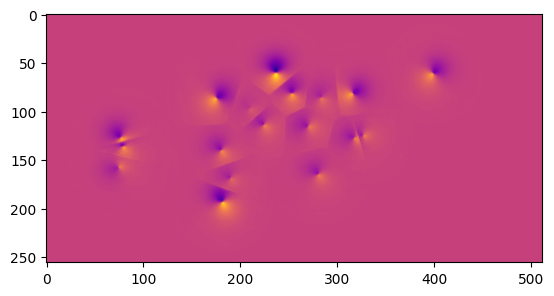

0.003968453285337727


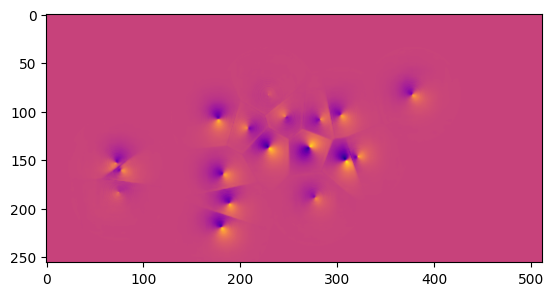

In [91]:
#calculating and displaying absolute error map
maxis = []
minis = []
means = []


for index,im in enumerate(val_images_annotations):
    out = outs[index]
    out = out.transpose(1,2,0)
    out = out.squeeze(axis=2)
    delta = im - out
    maxi = np.max(delta)
    maxis.append(maxi)
    mini = np.min(delta)
    minis.append(mini)
    mean = np.mean(np.abs(delta))
    means.append(mean)
    if index < 10:
        print(mean)
        plt.imshow(delta,cmap ='plasma')
    
        plt.show()
    

In [65]:
print(np.mean(maxis))
print(np.mean(minis))
print(np.mean(means))

0.20814466598529754
-0.1887429170080773
0.004596207188319366


In [66]:
dist_list = []

for ann in val_annotations:
    pt11 = ann[11]
    pt17 = ann[17]
    dist = np.linalg.norm(pt11-pt17)
    dist_list.append(dist)

mean_dist = np.mean(dist_list)
min_dist = np.min(dist_list)
r = 60 * np.sqrt(2)
print(np.min(dist_list),np.max(dist_list),np.mean(dist_list))

4.095452272271684 11.887700177960197 7.448748320476606


/tmp/ipykernel_11512/2262706355.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.75, 1])


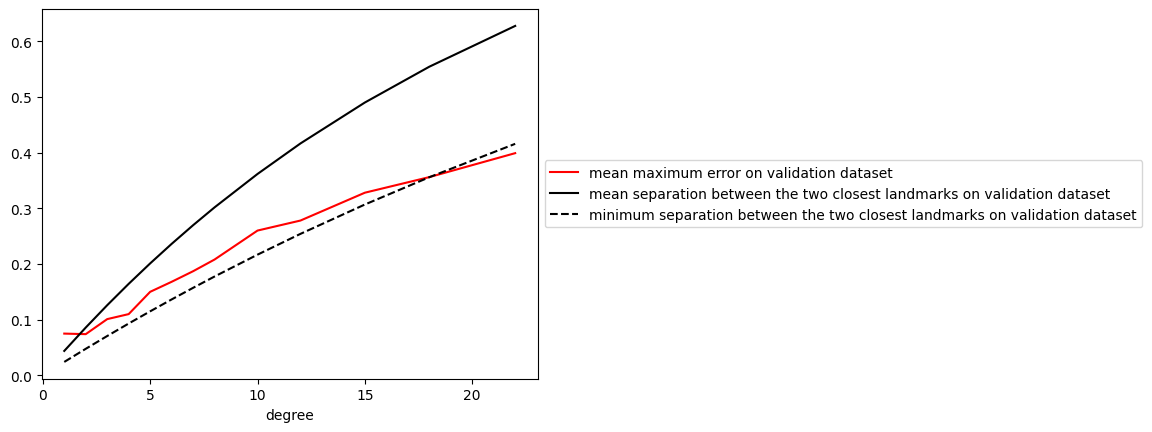

In [87]:
degrees = [1,2,3,4,5,6,7,8,10,12,15,18,22]

key_values = []
key_values_m = []

for d in degrees:
    score = 1-np.power(1-mean_dist/2/r,d)
    key_values.append(score)

for d in degrees:
    score = 1-np.power(1-min_dist/2/r,d)
    key_values_m.append(score)


mean_maxis = [0.062,0.068,0.091,0.107,0.129,0.168,0.176,0.208,0.260,0.278,0.328,0.356,0.399]
mean_mini = [0.075,0.074,0.101,0.110,0.150,0.144,0.187,0.189,0.259,0.264,0.284,0.287,0.358]

# plt.plot(degrees,mean_maxis,'r')
# plt.plot(degrees,mean_mini,'b')
plt.plot(degrees,np.maximum(mean_maxis,np.abs(mean_mini)),'r',label = 'mean maximum error on validation dataset')


plt.plot(degrees,key_values,'k',label ='mean separation between the two closest landmarks on validation dataset' )

plt.plot(degrees,key_values_m,'k--',label = 'minimum separation between the two closest landmarks on validation dataset')


# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('degree')


plt.tight_layout(rect=[0, 0, 0.75, 1])



# plt.xlim(1,6)
# plt.ylim(0,0.3)
plt.show()